# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [257]:
# !pip install  optuna

In [258]:
##Data Handling
import pandas as pd
import numpy as np

##Visualization Libraries 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline
import plotly.express as ex
import plotly.express as px
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)  # Initialize Plotly for offline mode

# Feature Processing (Scikit-learn processing, etc. )
import phik

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

# Other packages
import os
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# II. Data Loading
Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

#### 2.1 train dataset

In [259]:
path=r"C:\Users\Gregory Arthur\Desktop\Pandas\Sepsis\Paitients_Files_Train.csv"
df_train= pd.read_csv(path)
df_train.rename(columns={'PRG':'Plasma_glucose','PL': 'Blood_Work_R1','PR': 'Blood_Pressure',
                         'SK': 'Blood_Work_R2','TS': 'Blood_Work_R3','M11': 'BMI',
                         'BD2': 'Blood_Work_R4',
                         'Sepssis': 'Sepsis'}, inplace=True)
df_train.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### 2.2. test dataset

In [260]:
path=r"C:\Users\Gregory Arthur\Desktop\Pandas\Sepsis\Paitients_Files_Train.csv"
df_test= pd.read_csv(path)
df_test.rename(columns={'PRG':'Plasma_glucose','PL': 'Blood_Work_R1','PR': 'Blood_Pressure',
                         'SK': 'Blood_Work_R2','TS': 'Blood_Work_R3','M11': 'BMI',
                         'BD2': 'Blood_Work_R4'}, inplace=True)
df_test.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# III. Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

### 3.1 Dataset Overview

#### 3.1.1 Data info

In [261]:
# checking for info on the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.info(),"\n" + "---" * 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              599 non-null    object 
 1   Plasma_glucose  599 non-null    int64  
 2   Blood_Work_R1   599 non-null    int64  
 3   Blood_Pressure  599 non-null    int64  
 4   Blood_Work_R2   599 non-null    int64  
 5   Blood_Work_R3   599 non-null    int64  
 6   BMI             599 non-null    float64
 7   Blood_Work_R4   599 non-null    float64
 8   Age             599 non-null    int64  
 9   Insurance       599 non-null    int64  
 10  Sepsis          599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
the info df_train dataset are: 

 None 
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------

✍ summary:
- the train dataset has 11 features with 599 entries.
- the test dataset has 10 features with 169 entries.

#### 3.1.2 checking missing values

In [262]:
# checking for missing values in the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.isna().sum(),"\n" + "---" * 15)

the info df_train dataset are: 

 ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Age               0
Insurance         0
Sepsis            0
dtype: int64 
---------------------------------------------
the info df_test dataset are: 

 ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Age               0
Insurance         0
Sepssis           0
dtype: int64 
---------------------------------------------


- both datasets have no missing values

#### 3.1.3 checking Data shape

In [263]:
# checking for the shapes of the datasets
print(df_train.shape, df_test.shape)

(599, 11) (599, 11)


#### 3.1.4 Descriptive Statistics

In [264]:
# descriptive statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_R1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_R2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_R3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
BMI,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_R4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [265]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_R1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_R2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_R3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
BMI,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_R4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


✍ summary:

- From the descriptive statistics of the datasets there are some features with minimum value of 0.thus in Plasma glucose, Blood Work Result-1, Blood Pressure,Blood Work Result-2, Blood Work Result-3, and Body mass index. 
From Domain Knowledge in biology ,these features should not have a value of 0. Therefore, it is reasonable to assume that any missing value was filled out with 0.


- All features  have very high standard deviations, which means they are spreaded over a very wide range except for Blood Work Result-4.
From the descriptive statistics of the train set, the mean and median of some columns are very different from each other, especially in the following features: Plasma glucose, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4, Age. This indicates these columns have skewness in their distribution. Other columns also has some minor discrepancies between their means and medians, but not as extreme as those mentioned above.

#### 3.1.5 finding count and percentage of missing values in all the features

In [266]:
def count_missing_val(df, cols):
    print('\tMissing val Count\tMissing val Percentage')
    for col in cols:
        missing_cnt = df[col].value_counts()[0] # frequency of zero entries in a particular column
        missing_percentage = round((missing_cnt/len(df) * 100), 2)
        print(str(col) + ': \t\t' + str(missing_cnt) + '\t\t\t' + str(missing_percentage).zfill(5) + '\t%')

In [267]:
# finding the missing values in the respective columns in the train set
train_missing_col=['Plasma_glucose', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI']
count_missing_val(df_train, train_missing_col)

	Missing val Count	Missing val Percentage
Plasma_glucose: 		93			15.53	%
Blood_Pressure: 		28			04.67	%
Blood_Work_R2: 		175			29.22	%
Blood_Work_R3: 		289			48.25	%
BMI: 		9			001.5	%


In [268]:
# finding the missing values in the respective columns in the test set
test_missing_col=['Plasma_glucose', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI']
count_missing_val(df_test,test_missing_col)

	Missing val Count	Missing val Percentage
Plasma_glucose: 		93			15.53	%
Blood_Pressure: 		28			04.67	%
Blood_Work_R2: 		175			29.22	%
Blood_Work_R3: 		289			48.25	%
BMI: 		9			001.5	%


#### 3.1.6 checking for duplicates

In [269]:
#Check for duplicates
duplicate_rows_train = df_train.duplicated().sum()
duplicate_rows_test = df_test.duplicated().sum()
print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set


### 3.2 Descriptive Statistics & Central Tendencies

#### 3.2.1 checking for skewness

In [270]:
# checking for skewness
df_train.skew(numeric_only=True).sort_values(ascending=False)

Blood_Work_R3     2.401585
Blood_Work_R4     1.989472
Age               1.152353
Plasma_glucose    0.914008
Blood_Work_R2     0.164063
Blood_Work_R1     0.116180
BMI              -0.405255
Insurance        -0.804257
Blood_Pressure   -1.874662
dtype: float64

from the above it can be observed that:
- Positively-skewed: Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1, Blood Work Result-2
- Negatively-skewed: Blood Pressure, Insurance, Body mass index 

#### 3.2.2 visualization of skewness for the train set
- Histograms of these features will be plotted to visualize their distributions

In [271]:
# making a copy
train= df_train.copy()

In [272]:
def dist_plot(df, avoid, name_for_title):
    df_copy = df.copy(deep=True) # Copy the original dataframe
    df_copy.drop(labels=avoid, axis='columns',inplace=True) # Drop avoid columns
    
    # Set up subplots in 3x3 grid
    fig, axes = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 8))
    plt.suptitle('Distribution of Features in ' + name_for_title + ' Set', fontsize=20)
    
    r = 0 # current row
    c = 0 # current column
    
    for col in df_copy.columns:
        # Plot histogram of each column
        sns.histplot(data=df, x=col, kde=True, ax=axes[r, c])
        axes[r, c].title.set_text('Histogram of ' + str(col))
         # Update position for next subplot
        if (c == 2):
            c = 0
            r += 1
        else: 
            c += 1
            
    fig.delaxes(axes[2, 2]) # Delete unused subplot
        

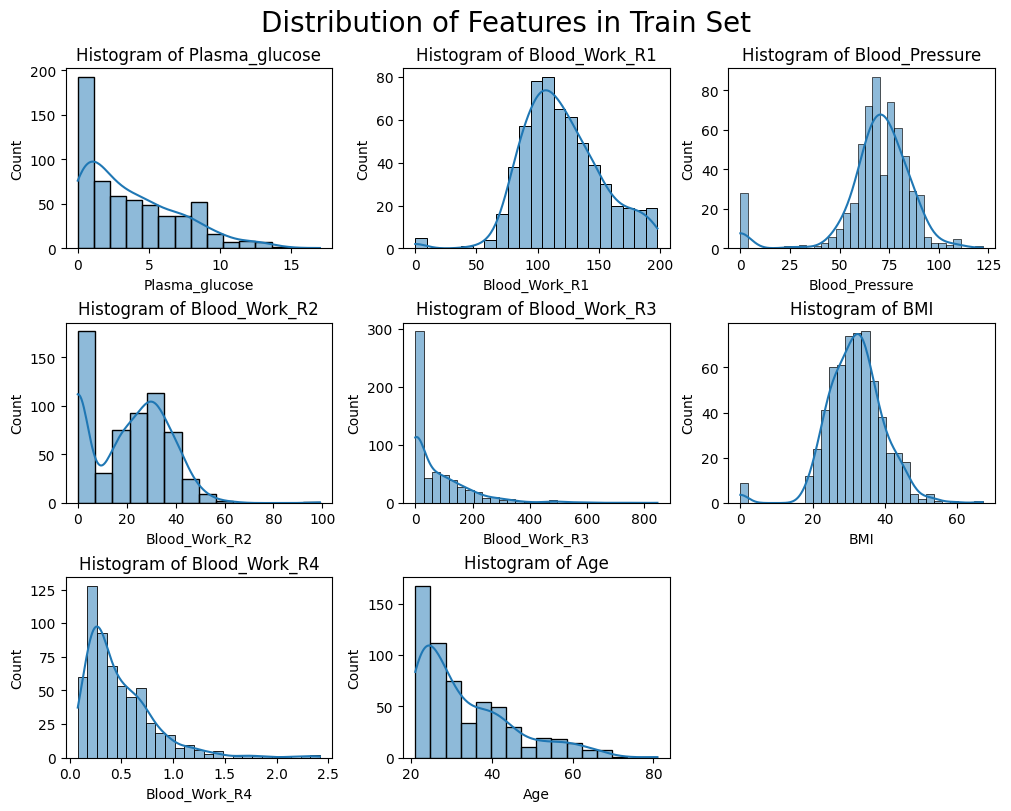

In [273]:
dist_plot(df=train, avoid=['ID', 'Insurance', 'Sepsis'], name_for_title='Train')

✍ summary:
- Right-skewed: Plasma glucose, Blood Work Result-2, Blood Work Result-3 , Blood Work Result-4, Age.
- Normally-distributed: Blood Work Result-1 , Blood Pressure, Body mass index.
- The skewness will be dealt with in the later section by normalizing the data

In [274]:
# similarly, checking for skewness for  the test dataset
df_test.skew(numeric_only=True).sort_values(ascending=False)

Blood_Work_R3     2.401585
Blood_Work_R4     1.989472
Age               1.152353
Plasma_glucose    0.914008
Blood_Work_R2     0.164063
Blood_Work_R1     0.116180
BMI              -0.405255
Insurance        -0.804257
Blood_Pressure   -1.874662
dtype: float64

✍ summary:
- Similar to the train set, the columns in the test set have very large standard deviation as well.
- Positively-skewed: Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1
- Negatively-skewed: Blood Pressure, Insurance, Body mass index, Blood Work Result-2 

#### 3.2.3 visualization of skewness for the test set
- The histograms of these features will be plotted to visualize their distributions:

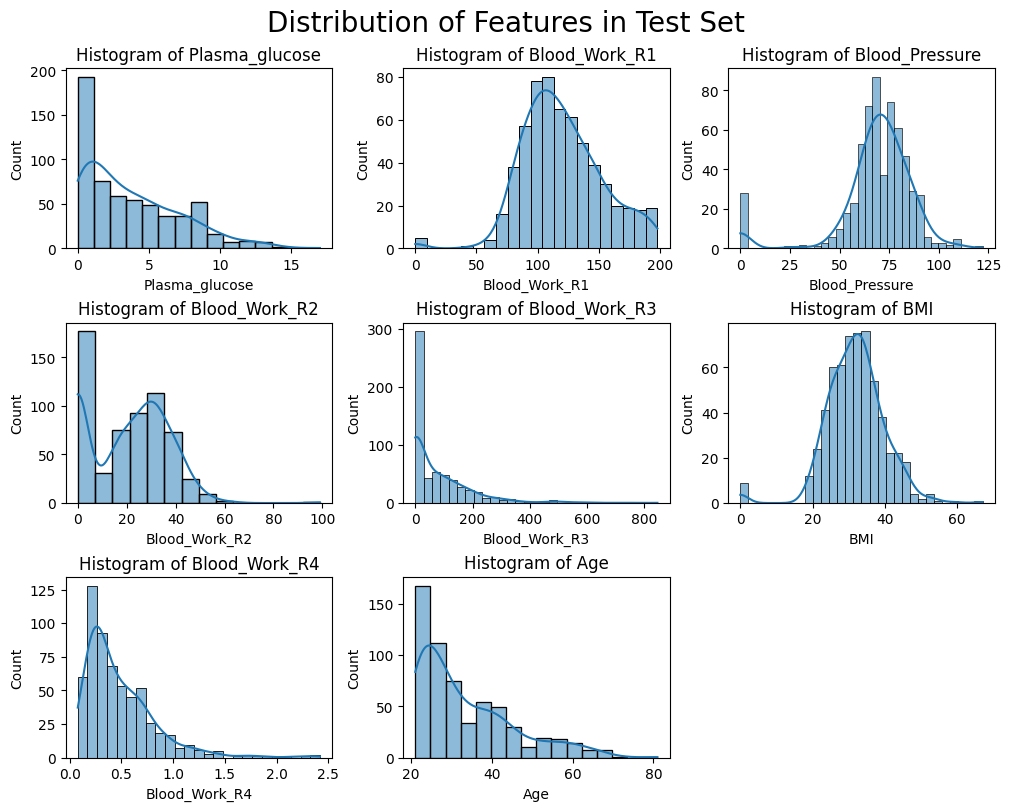

In [275]:
# making a copy
test=df_test.copy()
dist_plot(df=test, avoid=['ID', 'Insurance'], name_for_title='Test')

the distribution of the features are:
- Right-skewed: Plasma glucose, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4, Age.
- Normally-distributed: Blood Work Result-1, Blood Pressure, Body mass index.

#### 3.2.4 checking for outliers of each numerical column

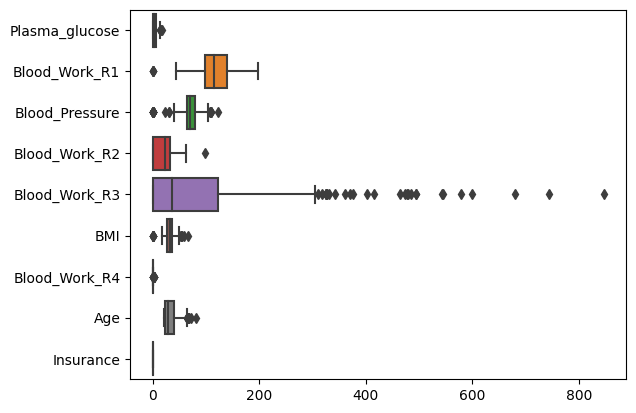

In [276]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=train, orient="h");

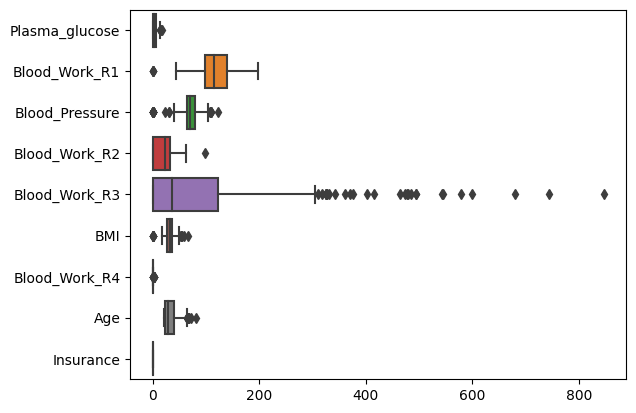

In [277]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=test, orient="h");

- the output indicates strongly that there are outliers in all the datasets

# IV. Data Cleaning and Pre-processing

#### 4.1 Handling of outliers

In [278]:
# function to check for outliers in the dataframe
def handle_outliers(data_frame, column_name, method='clip', threshold=1.5):
    """
    Handle outliers in a specified column of a DataFrame using the IQR method.

    Parameters:
        data_frame (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to handle outliers for.
        method (str, optional): The method to handle outliers. Options are 'clip' (default) or 'remove'.
        threshold (float, optional): The threshold to determine outliers in terms of IQR. Default is 1.5.

    Returns:
        pd.Series: The updated column with outliers handled.
    """
    column = data_frame[column_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    if method == 'clip':
        updated_column = column.clip(lower_bound, upper_bound)
    elif method == 'remove':
        updated_column = column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        raise ValueError("Invalid method. Choose 'clip' or 'remove'.")

    return updated_column


#### 4.2.1 Handling of outliers in the datasets

In [279]:
# handling outliers in the train dataset
train['Plasma_glucose'] = handle_outliers(train, 'Plasma_glucose', method='clip')
train['Blood_Work_R1']= handle_outliers(train, 'Blood_Work_R1', method='clip')
train['Blood_Pressure']= handle_outliers(train, 'Blood_Pressure', method='clip')
train['Blood_Work_R2']= handle_outliers(train, 'Blood_Work_R2', method='clip')
train['Blood_Work_R3']= handle_outliers(train, 'Blood_Work_R3', method='clip')
train['BMI']= handle_outliers(train, 'BMI', method='clip')
train['Age']= handle_outliers(train, 'Age', method='clip')
train['Insurance']= handle_outliers(train, 'Insurance', method='clip')


In [280]:
# handling outliers in the test dataset
test['Plasma_glucose'] = handle_outliers(test, 'Plasma_glucose', method='clip')
test['Blood_Work_R1']= handle_outliers(test, 'Blood_Work_R1', method='clip')
test['Blood_Pressure']= handle_outliers(test, 'Blood_Pressure', method='clip')
test['Blood_Work_R2']= handle_outliers(test, 'Blood_Work_R2', method='clip')
test['Blood_Work_R3']= handle_outliers(test, 'Blood_Work_R3', method='clip')
test['BMI']= handle_outliers(test, 'BMI', method='clip')
test['Age']= handle_outliers(test, 'Age', method='clip')
test['Insurance']= handle_outliers(test, 'Insurance', method='clip')


#### 4.2.2  visualization of outliers in the dataset

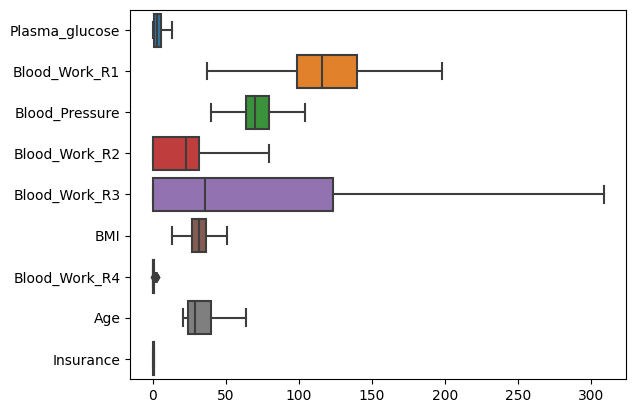

In [281]:
# checking for  outlier of each numerical column age
sns.boxplot(data=train, orient="h");

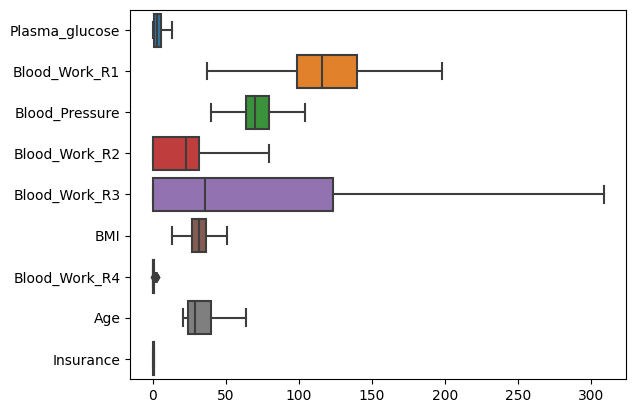

In [282]:
# checking for  outlier of each numerical column age
sns.boxplot(data=test, orient="h");

✍ summary:
there are no outliers now 

# V. Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

#### 5.1 visualization of the percentage unique values of our target

In [283]:
# visualizing the percentage unique values of the target  features.
import plotly.express as px
fig_1 = px.pie(train, names='Sepsis', title='Plot of Ratio of the Label Variables (Sepsis)')
iplot(fig_1)

✍ summary:
- from the visual, Label feature, We can observe that there is an imbalance in our dataset; therefore we will have to deal with that later.
- 65.3% of the patients are negative.
- 34.7% of the patients are positive.

#### 5.2 visualization of the features against  our target 
- At this stage we are going to compare all other features to the target or label. Since all features are continuous, box plot is used because it can clearly show the distribution, mean, and median of the features.

In [284]:
# function to compare the features against the target
def compare_plot(df, col):
    plt.figure(figsize=(5, 5))
    plt.title('Comparison of ' + str(col) + ' between sepsis-positive and sepsis-negative patients', 
              fontsize=20)
    
    # Property for the mean marker
    meanline = {'marker':'o', 'markersize':'10'}
    
    # Box plot of each column separated by Positive and Negative with sepsis
    # Show mean on box plot
    sns.boxplot(data=df, x='Sepsis', y=col, showmeans=True, meanprops=meanline)
    
    plt.xlabel('Sepsis', size=18)
    plt.ylabel(col, size=18)

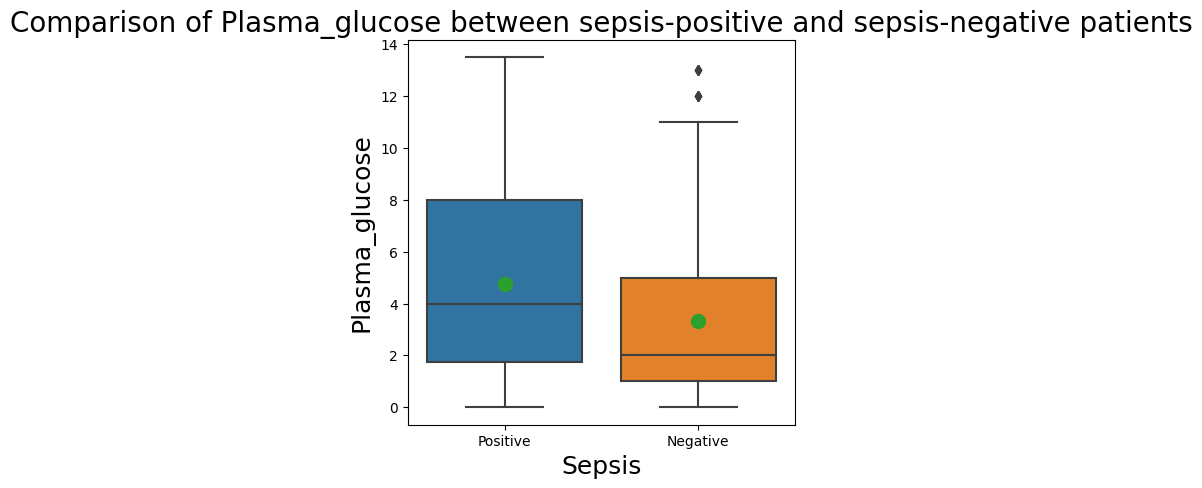

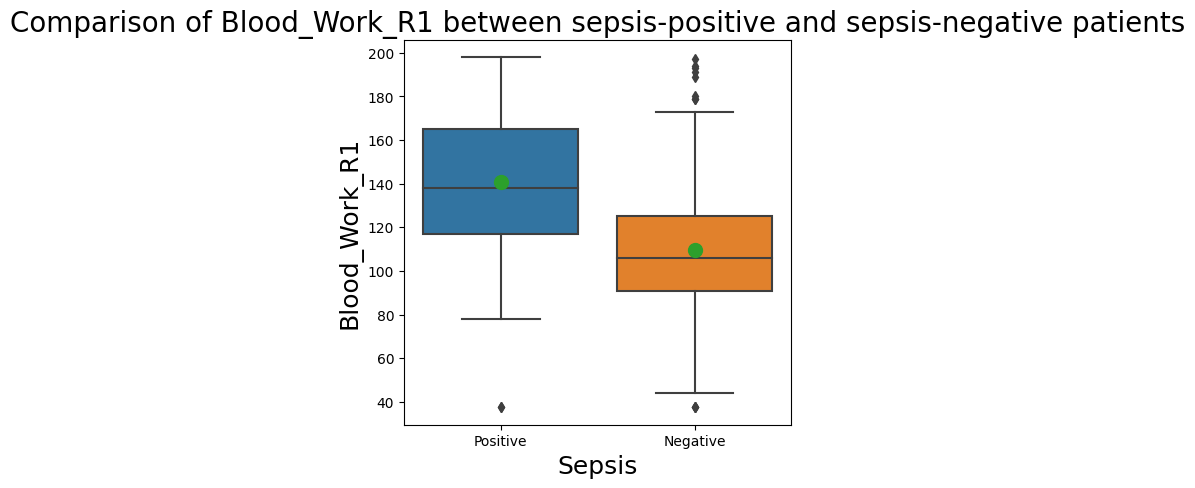

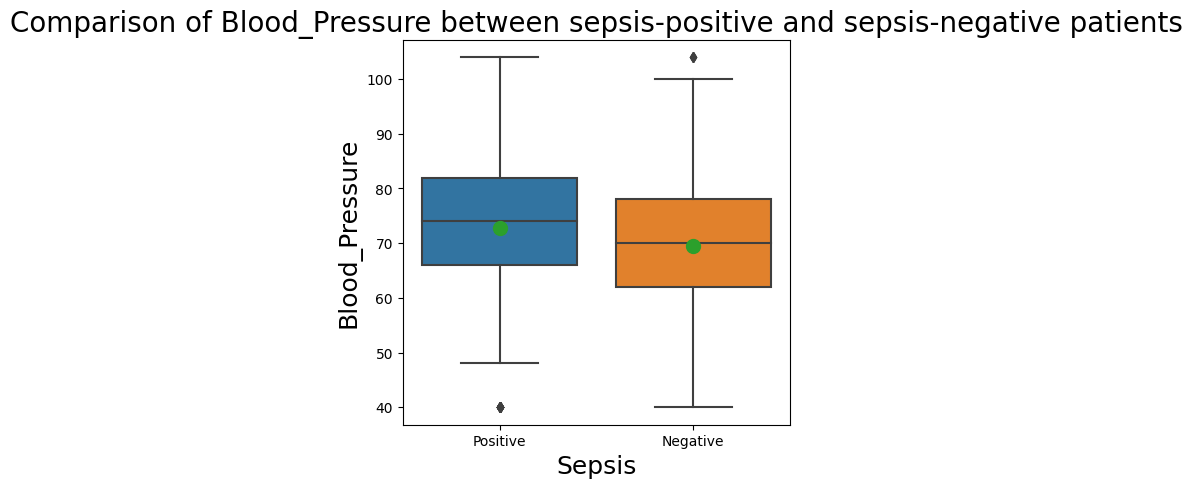

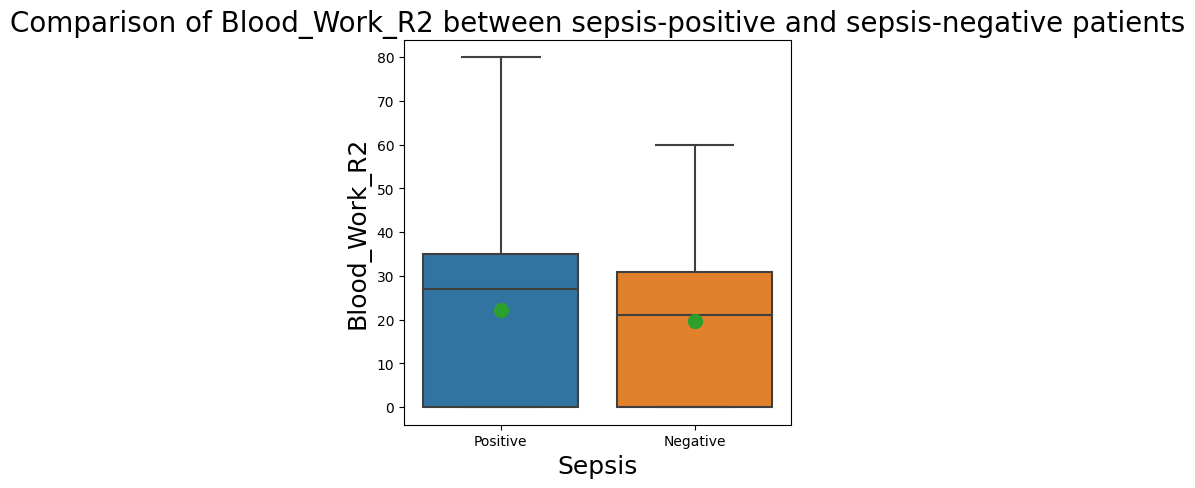

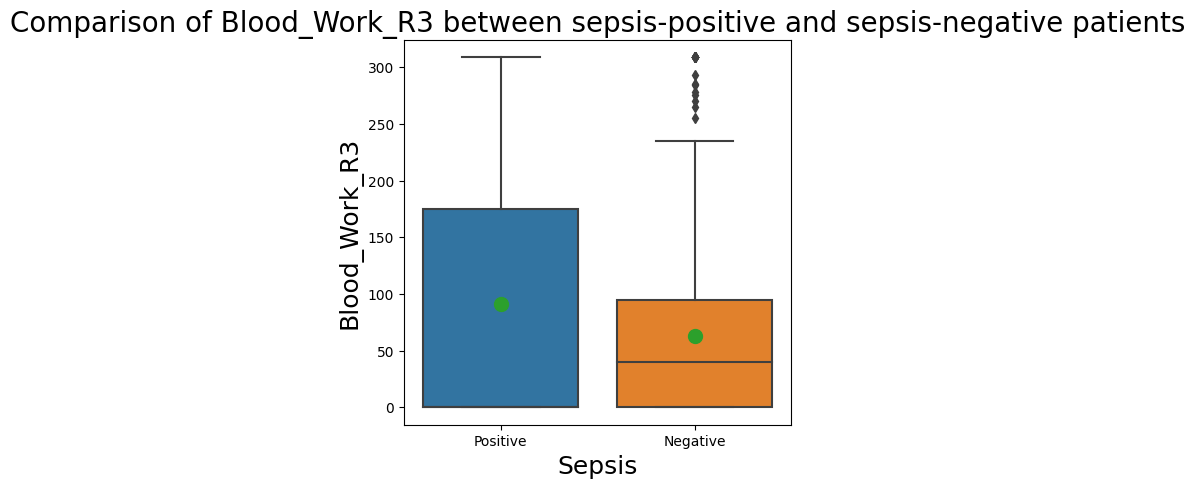

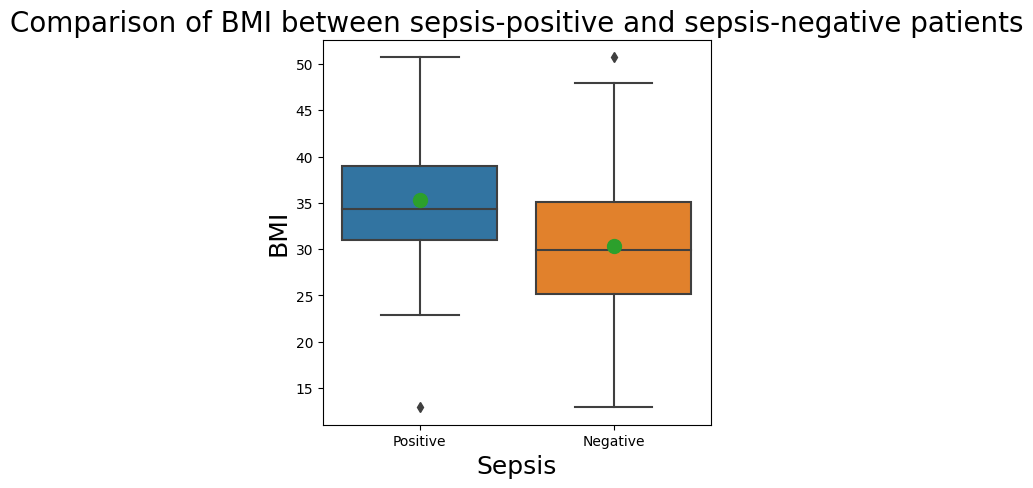

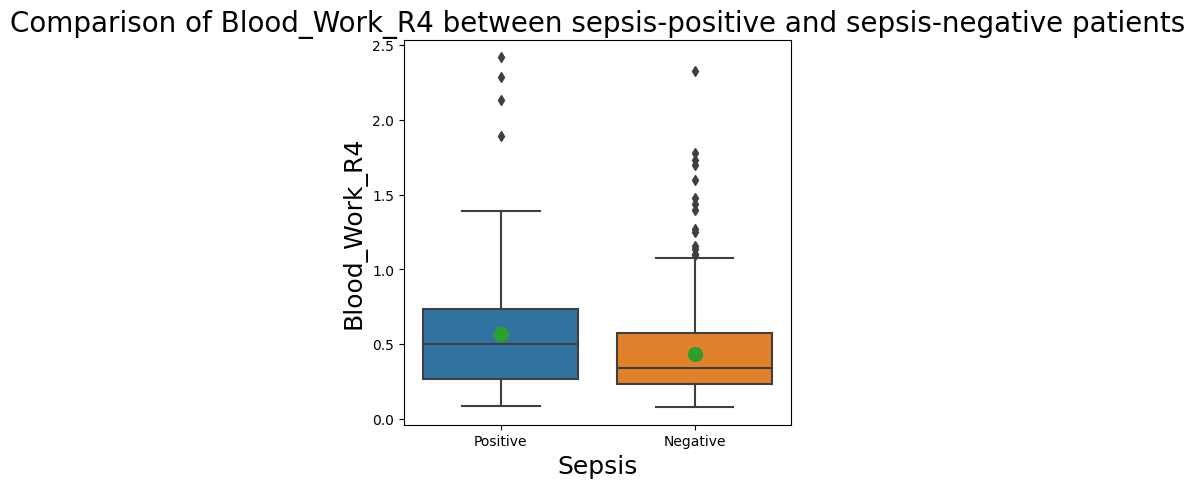

In [285]:
# calling  the compare plot function in the train set
cols = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 
        'Blood_Work_R3', 'BMI', 'Blood_Work_R4']
for col in cols:
    compare_plot(train, col)

✍ summary:
- It can be easily observed that patients who are positive with sepsis have higher readings in all of their health features comparing to the negative group. Hence, it can be reasonably inferred that patients with higher level of plasma glucose, Body mass index , and for blood work results are more likely to develop sepsis.

#### 5.2.1 visualization of  count of  age feature 
Here we would like know the frequency of the age in our dataset.

In [286]:
# determining age count
Age_counts = train.groupby('Age').size().reset_index(name='count')

In [287]:
# visualization of age count
fig_2 = ex.scatter(Age_counts, x='Age', y='count', size='count', color= 'Age', hover_name='Age',log_y=False, size_max=60)
fig_2.show()

✍ summary:
- from the visual the age with the highest frequency are ages 21 and 22 whiles age 61 has the lowest frequency

#### 5.2.2 visualization of age group against the target 
- Here, we are going to create age group to aids in our analysis.

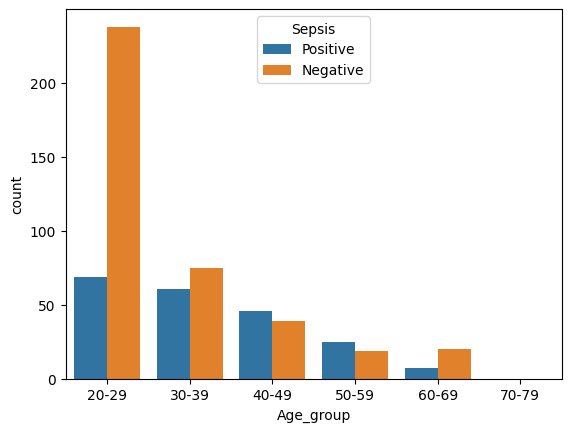

In [288]:
# Create the bin edges for the age groups
bins = list(range(20, 81, 10))

# Create the bin labels for the age groups (7 labels for 8 bins)
basket = ['{0}-{1}'.format(i, i + 9) for i in range(20, 81, 10)[:-1]]

# Use pd.cut() to assign age groups to each 'Age' value
train['Age_group'] = pd.cut(train['Age'], bins=bins, labels=basket, right=False)

# Plot the count of each age group colored by 'Sepsis'
sns.countplot(data=train, x='Age_group', hue='Sepsis');

✍ summary:
- from the visual, comparatively from 21-29 age group are less susceptive to sepsis than from 30-59 while patients at 60-69 are more susceptible sepsis, which i believe is because to weak immune system.

#### 5.2.3 visualization of count of other features against sepsis
- Here, we want varify how other features varies in terms of count with respect to the target feature

In [289]:
def create_histograms(data_frame, column_name):
    fig_3 = px.histogram(
        data_frame=data_frame,
        x=column_name,
        color="Sepsis",
        facet_col="Sepsis",
        nbins=50,
        title=f"{column_name} with Respect to Sepsis"
    )
    fig_3.show()

# Assuming your DataFrame is named 'train'
excluded_columns = ["Sepsis", "ID"]  # List of columns to exclude

for column in train.columns:
    if column not in excluded_columns:
        create_histograms(train, column)

✍ summary:
- Plasma glucose with Sepsis: from the visual it is evident that positive sepsis tends to fall as count of plasma glucose increases.Similarly, for the negative sepsis tends to also gradually diminish as the count of the plasma glucose increases. thus higher plasma glucose, the higher Plasma exchange, the higher the potential to improve survival in sepsis by removing inflammatory cytokines and restoring deficient plasma proteins.

- blood work result-1 and Sepsis: 

## Bivariate Analysis

In [290]:
train.columns

Index(['ID', 'Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure',
       'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age',
       'Insurance', 'Sepsis', 'Age_group'],
      dtype='object')

- Relationship Between Blood Pressure and Body mass index with Respect To Sepsis

In [291]:
fig_3=px.scatter(train, x="BMI", y= "Blood_Pressure",color= "Sepsis", 
                 title= "Relationship Between Blood Pressure and Body mass index with Respect To Sepsis")

iplot(fig_3)

- Relationship Between Plasma glucose and Body mass index with Respect To Sepsis

In [292]:
fig_4=px.scatter(train, x="Plasma_glucose", y= "BMI",color= "Sepsis", 
                 title= "Relationship Between Plasma glucose and Body mass index with Respect To Sepsis")

iplot(fig_4)

### Multivariate Analysis

In [293]:
##sns.heatmap(train.corr(), annot= True);

✍ Observation
- the correlation between features are weak, except for the plasma glucose and age which is 0.54. this also is weak. Hence all features will be kept.

In [294]:
##sns.heatmap(test.corr(), annot= True);

✍ Observation
- similarly, the correlation between features are weak, except for the plasma glucose and age with a correlation coefficient of 0.54. this also is weak. Hence all features will be kept.

## Feature Engineering

- in this section we will be selecting the best features to feed our models with. We will be using the Phi-Correlation

In [295]:
import phik
#the correlation of other features with churn
sepsis_corr= train.phik_matrix().loc["Sepsis"]
#sorting the values 
sepsis_cor=sepsis_corr.sort_values()
sepsis_corr

interval columns not set, guessing: ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance']


ID                1.000000
Plasma_glucose    0.282180
Blood_Work_R1     0.611669
Blood_Pressure    0.205354
Blood_Work_R2     0.229503
Blood_Work_R3     0.404616
BMI               0.429088
Blood_Work_R4     0.231272
Age               0.404641
Insurance         0.066436
Sepsis            1.000000
Age_group         0.393934
Name: Sepsis, dtype: float64

Text(0.5, 1.0, 'Phik Correlation Matrix for all  Features')

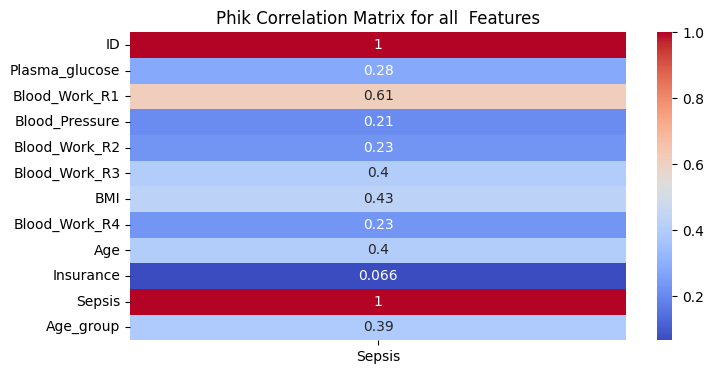

In [296]:
#ploting the phi-k correlation mattress
plt.figure(figsize= (8,4));
sns.heatmap(sepsis_corr.to_frame(), annot= True, cmap= "coolwarm")
plt.title("Phik Correlation Matrix for all  Features")

- from the phik correlation matrix, we will be dropping age_group since age and age_group are almost the same and we also drop insurance and ID.

In [297]:
# Drop some columns
train.drop(columns=['ID', 'Insurance','Age_group'], axis=1, inplace=True)
test.drop(columns=['ID','Insurance'], axis=1, inplace=True)

In [298]:
# unique values of the target
train['Sepsis'].unique()

array(['Positive', 'Negative'], dtype=object)

In [299]:
# Replace Positive with 1 and Negative with 0 in target column
train['Sepsis'].replace(to_replace='Positive', value='1', inplace=True)
train['Sepsis'].replace(to_replace='Negative', value='0', inplace=True)
# changing sepsis object type to integer
train['Sepsis'] = train['Sepsis'].astype('int')

In [300]:
train.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Sepsis
0,6.0,148.0,72,35,0.0,33.6,0.627,50,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0
4,0.0,137.0,40,35,168.0,43.1,2.288,33,1


In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  599 non-null    float64
 1   Blood_Work_R1   599 non-null    float64
 2   Blood_Pressure  599 non-null    int64  
 3   Blood_Work_R2   599 non-null    int64  
 4   Blood_Work_R3   599 non-null    float64
 5   BMI             599 non-null    float64
 6   Blood_Work_R4   599 non-null    float64
 7   Age             599 non-null    int64  
 8   Sepsis          599 non-null    int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 39.9 KB


In [302]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  599 non-null    float64
 1   Blood_Work_R1   599 non-null    float64
 2   Blood_Pressure  599 non-null    int64  
 3   Blood_Work_R2   599 non-null    int64  
 4   Blood_Work_R3   599 non-null    float64
 5   BMI             599 non-null    float64
 6   Blood_Work_R4   599 non-null    float64
 7   Age             599 non-null    int64  
 8   Sepssis         599 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 42.2+ KB


In [303]:
train.Sepsis.value_counts()

Sepsis
0    391
1    208
Name: count, dtype: int64

### handling imbalance target class

In [304]:
from sklearn.utils import resample
# Separate majority and minority classes
train_majority = train[train.Sepsis==0]
train_minority = train[train.Sepsis==1]
 
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=391,    # to match majority class
                                 random_state=123) # reproducible results
 
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

In [305]:
# Display new class counts
train_upsampled['Sepsis'].value_counts()

Sepsis
0    391
1    391
Name: count, dtype: int64

In [306]:
train_upsampled.columns

Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Sepsis'],
      dtype='object')

### Splitting data

In [307]:
X = train_upsampled.drop('Sepsis', axis=1)
y = train_upsampled.Sepsis

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42, stratify= y)

In [309]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((625, 8), (157, 8), (625,), (157,))

In [310]:
# checking for missing values
X_train.isna().sum()

Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Age               0
dtype: int64

In [311]:
## checking for missing values
X_train.isna().sum()

Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Age               0
dtype: int64

In [312]:
# checking for datatypes
def check_dtypes(data_frame):
    dtypes_dict = data_frame.dtypes.to_dict()
    return dtypes_dict

In [313]:
check_dtypes(X_train)

{'Plasma_glucose': dtype('float64'),
 'Blood_Work_R1': dtype('float64'),
 'Blood_Pressure': dtype('int64'),
 'Blood_Work_R2': dtype('int64'),
 'Blood_Work_R3': dtype('float64'),
 'BMI': dtype('float64'),
 'Blood_Work_R4': dtype('float64'),
 'Age': dtype('int64')}

✍ Observation
- there are no categorical features in the X_train

In [314]:
num_attr=X_train.columns

### Creating Pipelines

In [315]:
#creating pipelines
from sklearn.pipeline import Pipeline, make_pipeline
num_pipeline= Pipeline([('imputer', SimpleImputer()),('scaler', StandardScaler())])

In [316]:
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([('num_pipe',num_pipeline,num_attr)])

### Modelling

creating a pipeline for each ml model

In [317]:
models_trained= [] # empty list

DecisionTree Classifier

In [318]:
# instantiating the model
DTC=DecisionTreeClassifier() 

from imblearn.pipeline import Pipeline

DTC = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

In [319]:
DTC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [320]:
model_1= DTC.predict(X_test)

In [321]:

print(classification_report(model_1,y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        73
           1       0.85      0.79      0.81        84

    accuracy                           0.81       157
   macro avg       0.81      0.81      0.81       157
weighted avg       0.81      0.81      0.81       157



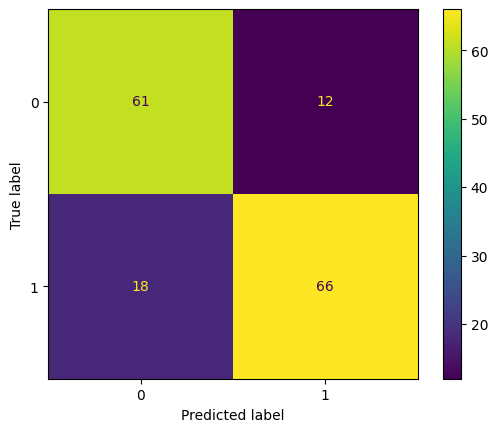

In [322]:
ConfusionMatrixDisplay.from_predictions(model_1,y_test);

In [323]:
models_trained.append(DTC)

Logistic Regressor Pipeline

In [324]:
LRP=LogisticRegression()
from sklearn.linear_model import LogisticRegression

LRP = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))
])


In [325]:
LRP.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))])

In [326]:
model_2= LRP.predict(X_test)

In [327]:
print(classification_report(model_2, y_test))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        82
           1       0.69      0.72      0.71        75

    accuracy                           0.71       157
   macro avg       0.71      0.71      0.71       157
weighted avg       0.71      0.71      0.71       157



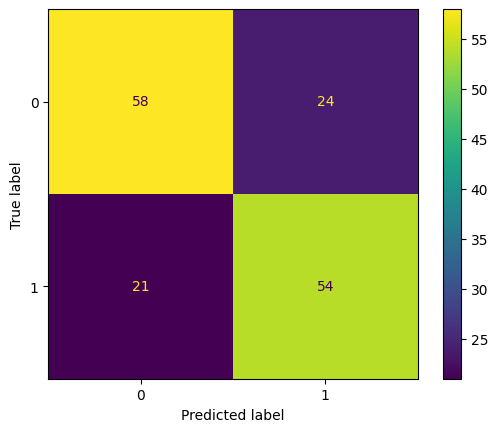

In [328]:
ConfusionMatrixDisplay.from_predictions(model_2, y_test);

In [329]:
models_trained.append(LRP)

Random forest pipeline

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
#instantiating
RFC=RandomForestClassifier()

RFC= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

In [332]:
RFC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [333]:
model_3= RFC.predict(X_test)

In [334]:
print(classification_report(model_3,y_test))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        71
           1       0.82      0.74      0.78        86

    accuracy                           0.77       157
   macro avg       0.77      0.77      0.77       157
weighted avg       0.78      0.77      0.77       157



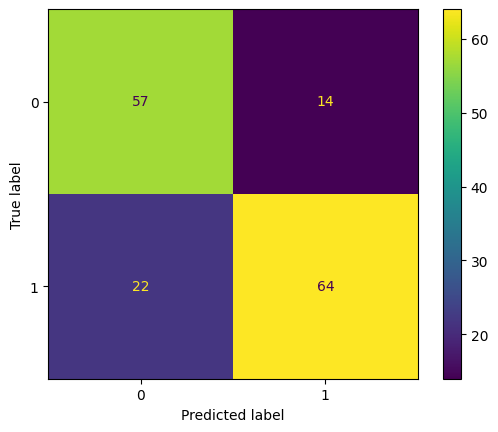

In [335]:
ConfusionMatrixDisplay.from_predictions(model_3,y_test);

In [336]:
models_trained.append(RFC)

SVM Pipeline

In [337]:
# instantiating
SVM=SVC()

SVM= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=SVC(gamma='auto')))
])

In [338]:
SVM.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', BaggingClassifier(base_estimator=SVC(gamma='auto')))])

In [339]:
model_4= SVM.predict(X_test)

In [340]:
print(classification_report(model_4, y_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        77
           1       0.76      0.74      0.75        80

    accuracy                           0.75       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.75      0.75      0.75       157



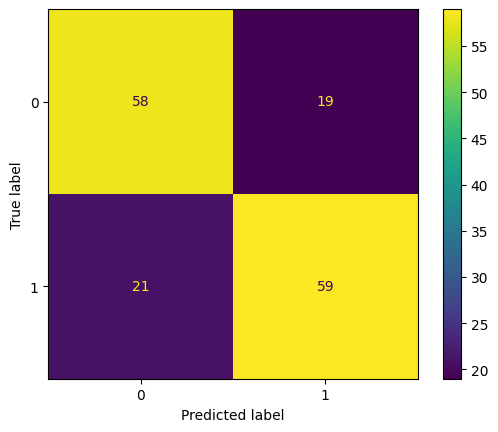

In [341]:
ConfusionMatrixDisplay.from_predictions(model_4, y_test);

In [342]:
models_trained.append(SVM)

XGBoost Pipeline

In [343]:
# instantiating the model
XGB=XGBClassifier()

XGB= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=XGBClassifier(random_state=42)))
])

In [344]:
XGB.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassi...
                                                                gpu_id=None,
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=None,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                n_estimators=100,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                predictor=None,
                                                                random_state=42, ...)))])

In [345]:
model_5=XGB.predict(X_test)

In [346]:
print(classification_report(model_5, y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        73
           1       0.87      0.81      0.84        84

    accuracy                           0.83       157
   macro avg       0.83      0.84      0.83       157
weighted avg       0.84      0.83      0.83       157



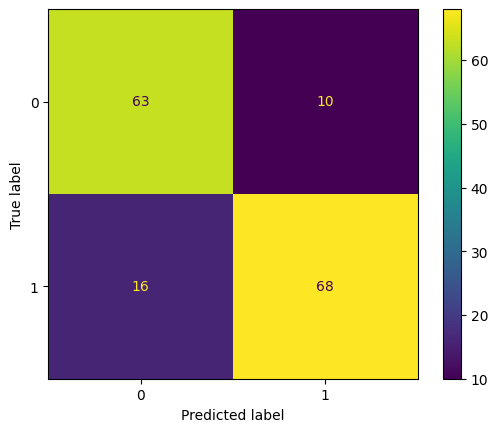

In [347]:
ConfusionMatrixDisplay.from_predictions(model_5, y_test);

In [348]:
models_trained.append(XGB)

AdaBoostClassifier 

In [349]:
Ada=AdaBoostClassifier()

Ada = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=AdaBoostClassifier(random_state=42)))
])

In [350]:
Ada.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=AdaBoostClassifier(random_state=42)))])

In [351]:
model_6 = Ada.predict(X_test)

In [352]:
print(classification_report(model_6, y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        76
           1       0.79      0.77      0.78        81

    accuracy                           0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



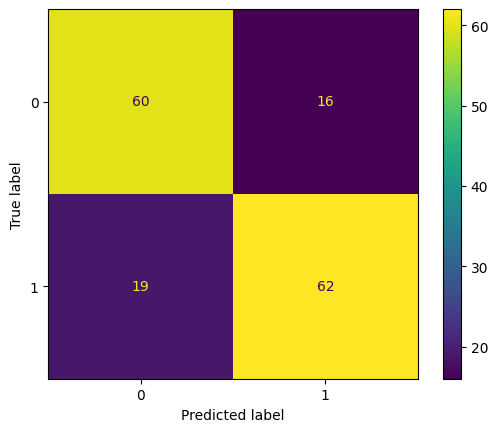

In [353]:
ConfusionMatrixDisplay.from_predictions(model_6, y_test);

In [354]:
models_trained.append(Ada)

Naive Bayes pipeline

In [355]:
NBP=GaussianNB()

NBP= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=GaussianNB()))
])

In [356]:
NBP.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', BaggingClassifier(base_estimator=GaussianNB()))])

In [357]:
model_7= NBP.predict(X_test)

In [358]:
print(classification_report(model_7, y_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        81
           1       0.68      0.70      0.69        76

    accuracy                           0.69       157
   macro avg       0.69      0.69      0.69       157
weighted avg       0.69      0.69      0.69       157



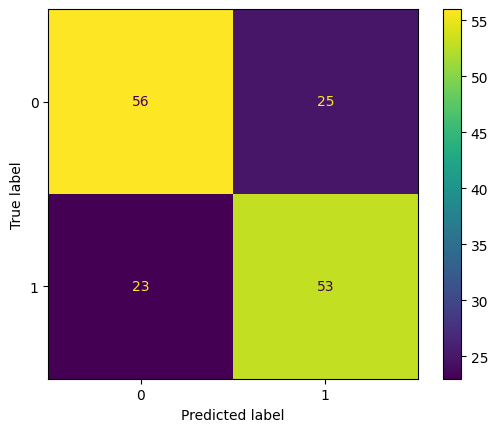

In [359]:
ConfusionMatrixDisplay.from_predictions(model_7,y_test);

### Model Comparison

In [360]:
from sklearn.metrics import accuracy_score

In [361]:
pipelines = [DTC, SVM, LRP, NBP, Ada, XGB, RFC]
res = []

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    model_name = pipe.named_steps['model'].base_estimator.__class__.__name__
    accuracy_score_value = accuracy_score(y_test, pipe.predict(X_test))
    result = {'model': model_name, 'metric(accuracy_score)': accuracy_score_value}
    res.append(result)
results = pd.DataFrame(res)
results = results.sort_values(by='metric(accuracy_score)', ascending=False)
results

,model,metric(accuracy_score)
5,XGBClassifier,0.834395
4,AdaBoostClassifier,0.777070
6,RandomForestClassifier,0.770701
0,DecisionTreeClassifier,0.764331
1,SVC,0.732484
2,LogisticRegression,0.732484
3,GaussianNB,0.681529


### Hyperparameter tuning

In [362]:
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import BaggingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define your best model pipeline
XGB = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=XGBClassifier(random_state=42)))
])

# Define the hyperparameters grid for XGBoost
param_grid_xgb = {
    "model__base_estimator__learning_rate": [0.1, 0.01],
    "model__base_estimator__max_depth": [5,10,20],
    "model__base_estimator__n_estimators": [50,100, 200]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search_xgb = GridSearchCV(estimator=XGB, param_grid=param_grid_xgb, scoring='accuracy', cv=5)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Predict on the test set using the best XGBoost model
y_pred = best_model_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params_xgb}")
print(f"Accuracy: {accuracy}")


Best Parameters: {'model__base_estimator__learning_rate': 0.1, 'model__base_estimator__max_depth': 10, 'model__base_estimator__n_estimators': 100}
Accuracy: 0.8280254777070064


In [363]:
import optuna
from sklearn.datasets import load_iris
XGB = XGBClassifier()

# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 50, 300)

    model = Pipeline([
        ("col_trans", full_pipeline),
        ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
        ("model", BaggingClassifier(base_estimator=XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=42), random_state=42))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study object and optimize
study = optuna.create_study(direction='maximize')  # 'maximize' for accuracy
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Print the optimization results
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-08-16 04:37:20,508] A new study created in memory with name: no-name-958800a8-5a95-4a48-a755-b4ae3019c7c1


[I 2023-08-16 04:37:23,738] Trial 0 finished with value: 0.8471337579617835 and parameters: {'learning_rate': 0.0520795042519819, 'max_depth': 10, 'n_estimators': 290}. Best is trial 0 with value: 0.8471337579617835.
[I 2023-08-16 04:37:26,326] Trial 1 finished with value: 0.8535031847133758 and parameters: {'learning_rate': 0.035931748082217316, 'max_depth': 8, 'n_estimators': 206}. Best is trial 1 with value: 0.8535031847133758.
[I 2023-08-16 04:37:28,770] Trial 2 finished with value: 0.7961783439490446 and parameters: {'learning_rate': 0.009073370471955857, 'max_depth': 4, 'n_estimators': 246}. Best is trial 1 with value: 0.8535031847133758.
[I 2023-08-16 04:37:31,164] Trial 3 finished with value: 0.8598726114649682 and parameters: {'learning_rate': 0.0579110194890994, 'max_depth': 6, 'n_estimators': 240}. Best is trial 3 with value: 0.8598726114649682.
[I 2023-08-16 04:37:33,456] Trial 4 finished with value: 0.8535031847133758 and parameters: {'learning_rate': 0.0713637041284674, '

Number of finished trials:  100
Best trial:
Value:  0.8598726114649682
Params: 
    learning_rate: 0.0579110194890994
    max_depth: 6
    n_estimators: 240


In [364]:
# Extract the result
def get_params(input_study) :
    params = {k: v for k, v in input_study.best_params.items() if k not in ('dim_red', 'scalers')}
    change = []
    for k,v in dict(params).items():
        tmp_name = k
        if 'XGBClassifier' not in tmp_name :
            res = f"XGBClassifier__{tmp_name}"
            params[res] = params.pop(tmp_name)
            change.append(res)
    return params

params = get_params(study)
params

{'XGBClassifier__learning_rate': 0.0579110194890994,
 'XGBClassifier__max_depth': 6,
 'XGBClassifier__n_estimators': 240}

In [365]:
#hy_XGB=XGB.set_params(**params)

In [366]:
XGB_hy = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=XGBClassifier(
        learning_rate=0.06800670161468735,
        max_depth=5,
        n_estimators=249,
        random_state=42
    )))
])

In [367]:
XGB_hy.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassi...
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.06800670161468735,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=5,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                n_estimators=249,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                predictor=None,
                                                                random_state=42, ...)))])

In [368]:
final_model= XGB_hy.predict(X_test)

In [369]:
print(classification_report(final_model, y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        73
           1       0.87      0.81      0.84        84

    accuracy                           0.83       157
   macro avg       0.83      0.84      0.83       157
weighted avg       0.84      0.83      0.83       157



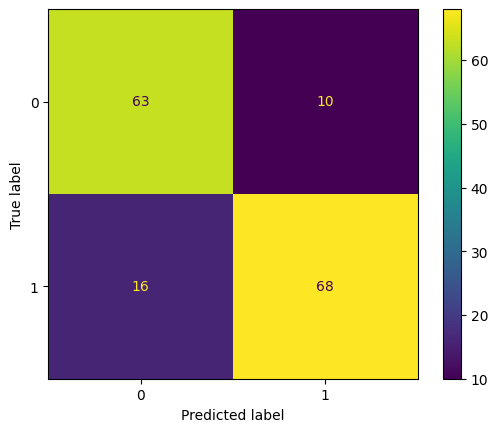

In [370]:
ConfusionMatrixDisplay.from_predictions(final_model,y_test);

In [371]:
from joblib import dump, load

In [372]:
dump(XGB_hy, r"C:\Users\Gregory Arthur\Desktop\models\xgb.joblib")

['C:\\Users\\Gregory Arthur\\Desktop\\models\\xgb.joblib']

In [373]:
X_train.columns

Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')

In [374]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625 entries, 547 to 566
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  625 non-null    float64
 1   Blood_Work_R1   625 non-null    float64
 2   Blood_Pressure  625 non-null    int64  
 3   Blood_Work_R2   625 non-null    int64  
 4   Blood_Work_R3   625 non-null    float64
 5   BMI             625 non-null    float64
 6   Blood_Work_R4   625 non-null    float64
 7   Age             625 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 43.9 KB
